In [2]:
import nipy
from nibabel.testing import data_path
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pathlib


In [3]:
path = pathlib.Path('/mnt/e/mgr/datasets/brain/Brats2021_training_df/BraTS2021_00495')
brain_sample = {}
for file in path.iterdir():
    sample = nib.load(file)
    brain_sample[file.name[:-7]] = sample.get_fdata()

In [14]:
sample = nib.load('/mnt/e/mgr/datasets/brain/Brats2021_training_df/BraTS2021_00002/BraTS2021_00002_seg.nii.gz')

In [20]:
sample.

In [4]:
def plot_brain_slices(sample):
    fig, ax = plt.subplots(nrows=40, ncols=4, figsize=(12, 130))
    for i in range(155):
        firstslice = sample[:, : , i]
        ax[int(i/4)][i%4].imshow(firstslice, cmap='gray')
        ax[int(i/4)][i%4].set_title(i)
    plt.show()

In [7]:
print(brain_sample.keys())

dict_keys(['BraTS2021_00203_flair', 'BraTS2021_00203_seg', 'BraTS2021_00203_t1', 'BraTS2021_00203_t1ce', 'BraTS2021_00203_t2'])


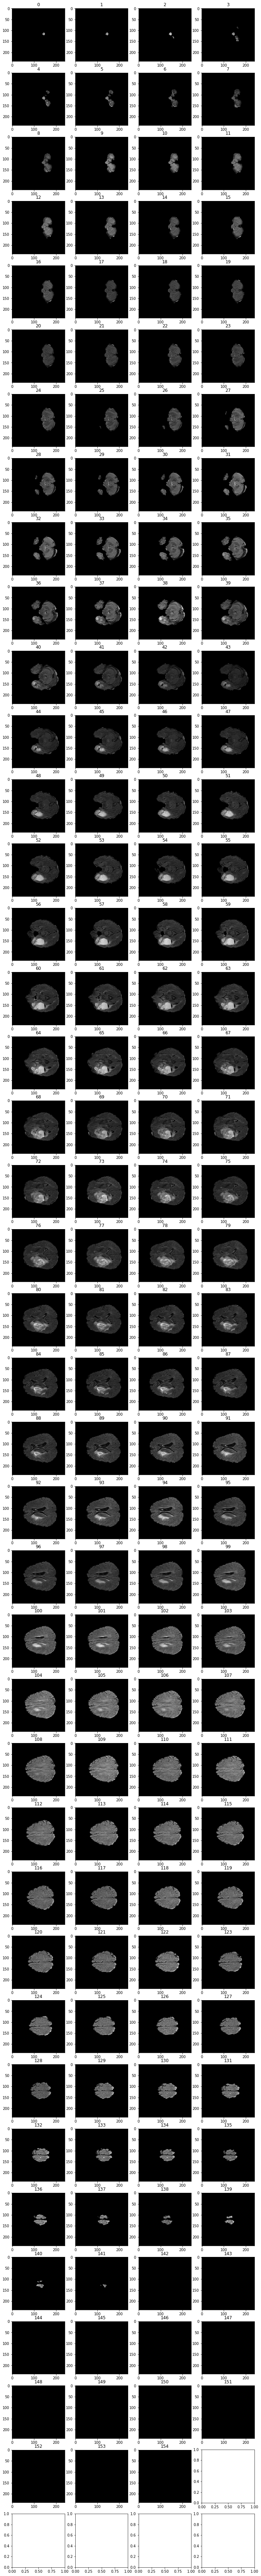

In [8]:
plot_brain_slices(brain_sample['BraTS2021_00203_flair'])

In [37]:
brain_sample.keys()

dict_keys(['BraTS2021_00495_flair', 'BraTS2021_00495_seg', 'BraTS2021_00495_t1', 'BraTS2021_00495_t1ce', 'BraTS2021_00495_t2'])

In [5]:
from DiagnosisAI.utils.utils_function import get_max_area_slice

/home/michalheit/miniconda3/envs/mgr_dp/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
get_max_area_slice(brain_sample['BraTS2021_00495_seg'])

110

In [9]:
rgb_seg = np.zeros((*brain_sample['BraTS2021_00495_seg'][:, :, 110].shape, 3), dtype=np.uint8)

In [31]:
rgb_seg[brain_sample['BraTS2021_00495_seg'][:, :, 110] == 1] = (0, 0, 255) # core
rgb_seg[brain_sample['BraTS2021_00495_seg'][:, :, 110] == 2] = (0, 255, 0) # invaded
rgb_seg[brain_sample['BraTS2021_00495_seg'][:, :, 110] == 4] = (255, 0, 0) # enhancing

In [33]:
import cv2
rgb_seg = cv2.cvtColor(rgb_seg, cv2.COLOR_BGR2RGB)

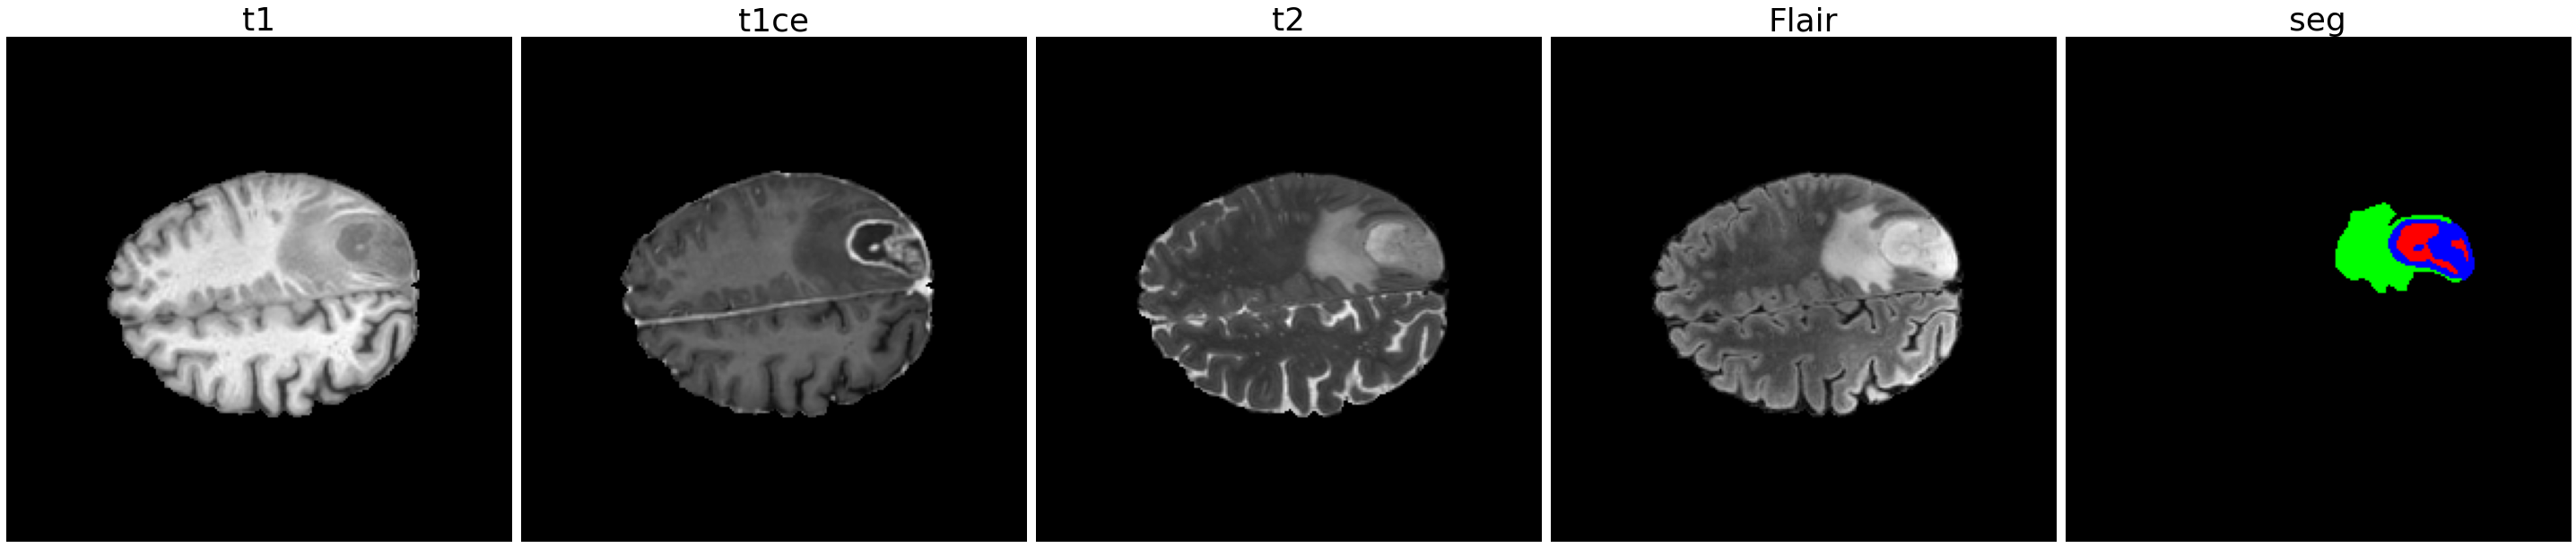

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(40, 15))

ax[3].imshow(brain_sample['BraTS2021_00495_flair'][:, :, 110], cmap='gray')
ax[3].set_title('Flair', size=36)
ax[0].imshow(brain_sample['BraTS2021_00495_t1'][:, :, 110], cmap='gray')
ax[0].set_title('t1', size=36)
ax[1].imshow(brain_sample['BraTS2021_00495_t1ce'][:, :, 110], cmap='gray')
ax[1].set_title('t1ce', size=36)
ax[2].imshow(brain_sample['BraTS2021_00495_t2'][:, :, 110], cmap='gray')
ax[2].set_title('t2', size=36)
ax[4].imshow(rgb_seg)
ax[4].set_title('seg', size=36)
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off')
ax[4].axis('off')
fig.tight_layout()

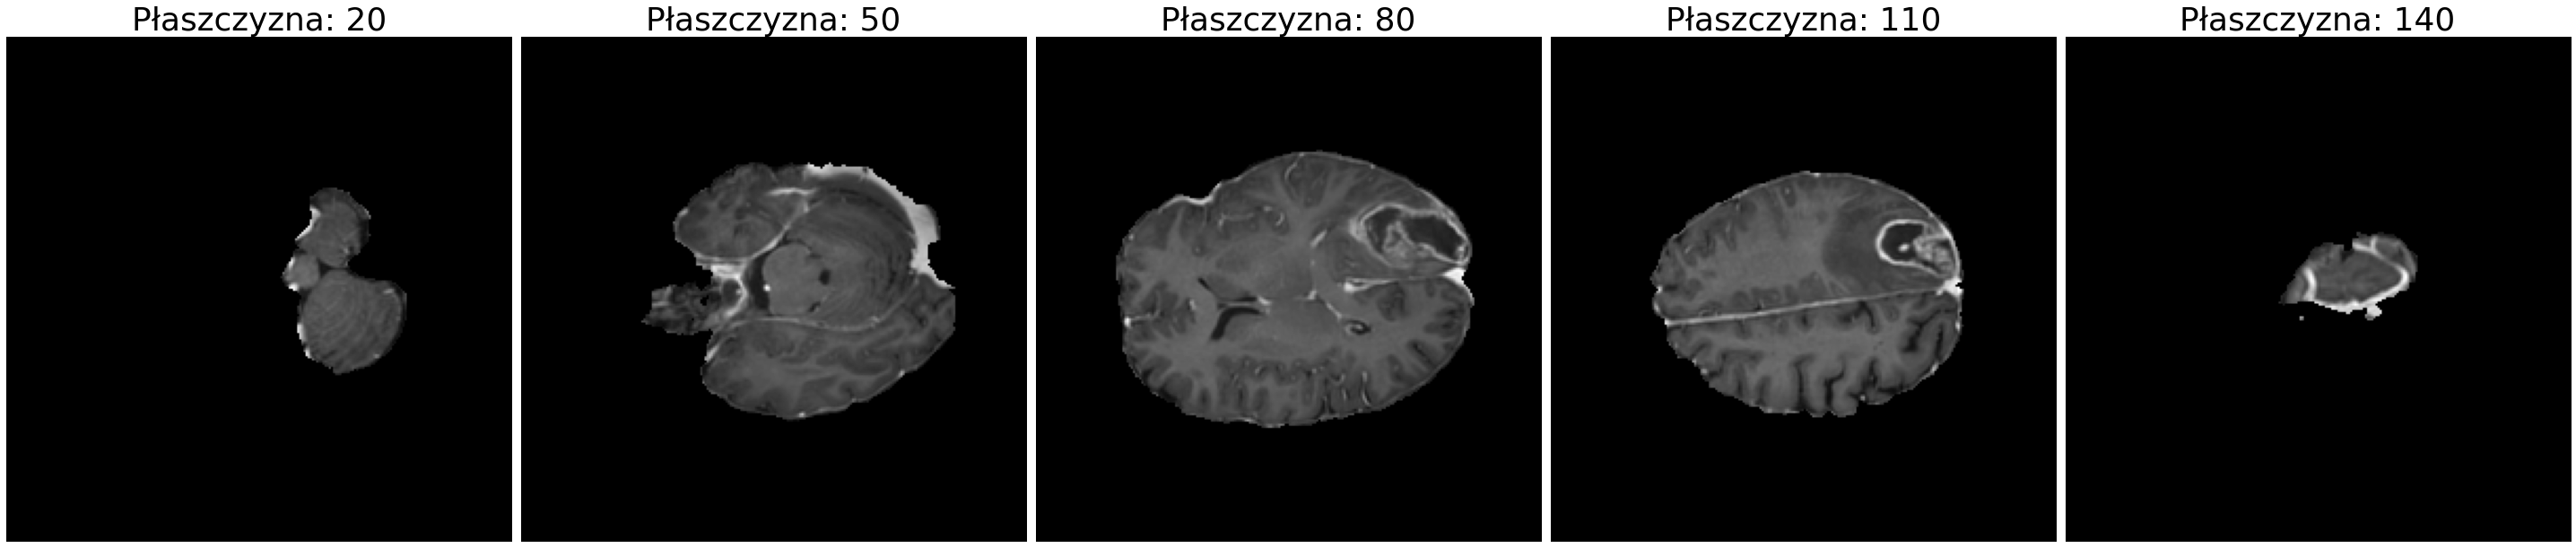

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(40, 15))

ax[0].imshow(brain_sample['BraTS2021_00495_t1ce'][:, :, 20], cmap='gray')
ax[0].set_title('Płaszczyzna: 20', size=36)
ax[1].imshow(brain_sample['BraTS2021_00495_t1ce'][:, :, 50], cmap='gray')
ax[1].set_title('Płaszczyzna: 50', size=36)
ax[2].imshow(brain_sample['BraTS2021_00495_t1ce'][:, :, 80], cmap='gray')
ax[2].set_title('Płaszczyzna: 80', size=36)
ax[3].imshow(brain_sample['BraTS2021_00495_t1ce'][:, :, 110], cmap='gray')
ax[3].set_title('Płaszczyzna: 110', size=36)
ax[4].imshow(brain_sample['BraTS2021_00495_t1ce'][:, :, 140], cmap='gray')
ax[4].set_title('Płaszczyzna: 140', size=36)
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off')
ax[4].axis('off')
fig.tight_layout()


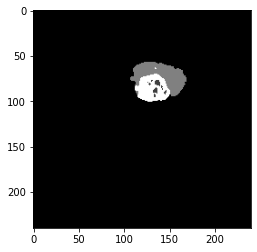

In [16]:
import pickle
with open('/mnt/e/mgr/datasets/brain/train_images/BraTS2021_00084/BraTS2021_00084_slices_dict.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)

plt.imshow(unserialized_data['seg'], cmap='gray')